In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path

### GD vs. Momentum

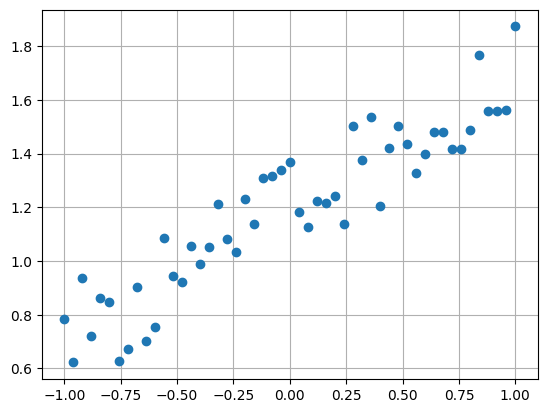

In [2]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5*x + 1.0
y_train = f(x_train) + 0.4*np.random.rand(len(x_train))
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

In [3]:
np.random.seed(303)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
x_train = x_train[shuffled_id]
y_train = y_train[shuffled_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5*(w[0]*x_set[i] + w[1] - y_set[i])**2
    return val / N

def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0]*x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    : param batch_szsie : The batch size
    : param features: List of features
    : param labels : List of labels
    : return: Batches of (Features, Labels)
    """

    assert len(features) == len(labels)
    outout_batches=[]
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches


### Gradient Descents

In [71]:
#SGD
batch_size = 5
lr = 0.01
MaxEpochs = 51
# Momentum
alpha = .9


In [72]:
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size,x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [2.90275135 0.50479397] 1.2733054655426301
20 [2.15617525 0.99182968] 0.5219595208536493
30 [1.64165673 1.14552108] 0.24713691137874
40 [1.28484796 1.19121275] 0.12268802367937626
50 [1.03666579 1.20274454] 0.06302098925267699


### Momentum

In [73]:
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size,x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr * grad
        w1 = w0 + velocity
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.46015288 1.20399806] 0.0067860452005677994
20 [0.46545713 1.19649799] 0.006738938857924861
30 [0.4654588  1.19652139] 0.006738973504324363
40 [0.46545874 1.19652132] 0.006738973432581432
50 [0.46545874 1.19652132] 0.006738973432676338


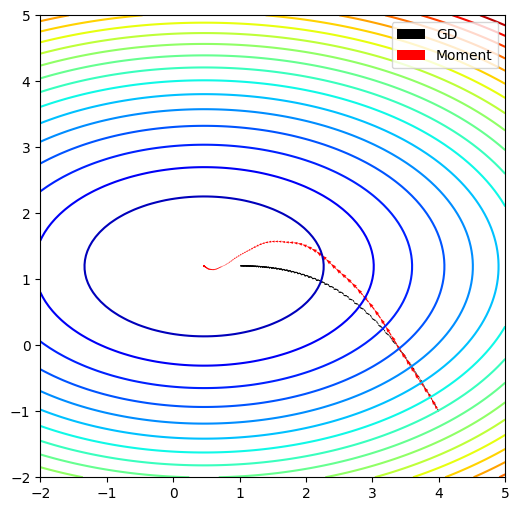

In [74]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j], w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(w0, w1, lossw, cmap = plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')
plt.legend(['GD', 'Moment'])
plt.show()

In [75]:
batch_size = 10
lr = 1.25
MaxEpochs = 51
# Adagrad
epsilon = lr
delta = 1e-7

#RMSProp
rho = 0.9

### Adagrad


In [76]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size,x_train, y_train):
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad*grad
        delw = -epsilon/(delta + np.sqrt(r))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.45591534 1.1994341 ] 0.00676849822207399
20 [0.45589404 1.19942922] 0.006768558362201502
30 [0.45592206 1.19942797] 0.006768445255712818
40 [0.45594982 1.19942672] 0.006768333426024389
50 [0.4559773  1.19942546] 0.006768222852714325


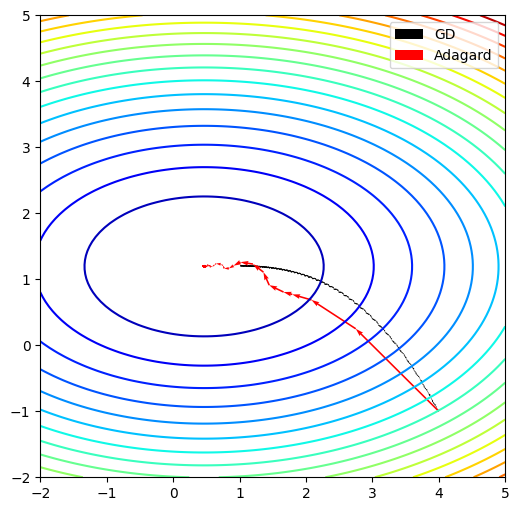

In [77]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j], w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(w0, w1, lossw, cmap = plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Adagard'])
plt.show()

In [84]:
batch_size = 10
lr = 0.1
MaxEpochs = 51
# Adagrad
epsilon = lr
delta = 1e-6

#Adam
delta_adam = 1e-6
rho = 0.9
rho2 = 0.999

### RMSPROP

In [89]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size,x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r * rho + grad*grad*(1-rho)
        delw = -epsilon/(np.sqrt(r + delta))*grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.46456558 1.20512106] 0.006789718705465277
20 [0.43674458 1.21300852] 0.007058189427519757
30 [0.43674954 1.21300674] 0.007058105455299311
40 [0.43674954 1.21300674] 0.007058105454484383
50 [0.43674954 1.21300674] 0.007058105454484371


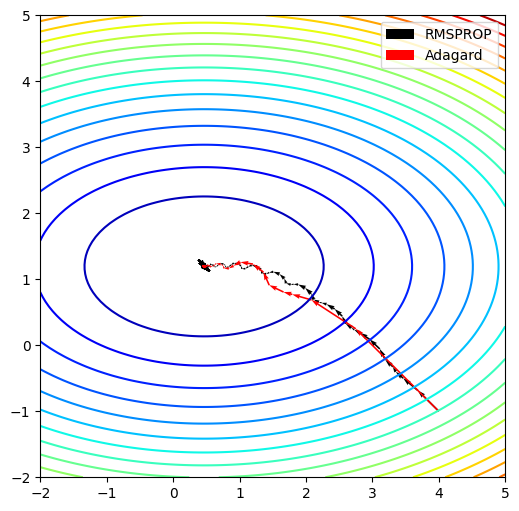

In [90]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j], w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(w0, w1, lossw, cmap = plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_rmsprop
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['RMSPROP', 'Adagard'])
plt.show()

### Adam

In [97]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
s = np.zeros_like(w0)
path_adam = []
t = 0
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size,x_train, y_train):
        t += 1
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        s = rho * s + (1 - rho) * grad
        r = rho2 * r + (1 - rho2) * grad * grad
        shat = s / ((1 - rho ** t))
        rhat = r / ((1 - rho2 ** t))
        delw = -epsilon/(delta_adam + np.sqrt(rhat))*shat
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.50374385 1.27270503] 0.009991359232179546
20 [0.4674836  1.20122066] 0.006756846689828097
30 [0.46421774 1.1973704 ] 0.006741555273013395
40 [0.46458265 1.19746515] 0.006741458572859574
50 [0.46452398 1.19749213] 0.0067415750763347385


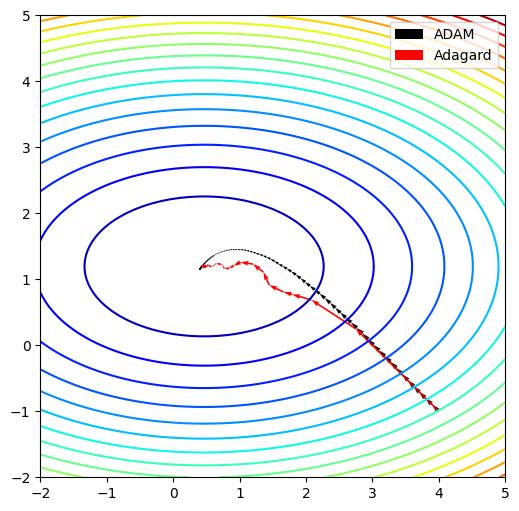

In [98]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0*0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j], w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
ax.contour(w0, w1, lossw, cmap = plt.cm.jet, levels=np.linspace(0, max(lossw.flatten()), 20))
paths = path_adam
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0, 1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['ADAM', 'Adagard'])
plt.show()